In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('predictive_maintenance_dataset.csv')
data

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [3]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64


In [6]:
def handle_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [7]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
handle_outliers(data, numeric_columns)

In [8]:
scaler = StandardScaler()

In [9]:
columns_to_scale = numeric_columns.drop(['failure'], errors='ignore')  # Exclude target column
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [10]:
X = data.drop(columns=['failure', 'device', 'date'], errors='ignore')  # Drop irrelevant columns
y = data['failure']

In [11]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Output the shape of the training and testing sets
print(f"Training Features: {X_train.shape}, Training Labels: {y_train.shape}")
print(f"Testing Features: {X_test.shape}, Testing Labels: {y_test.shape}")

Training Features: (99595, 9), Training Labels: (99595,)
Testing Features: (24899, 9), Testing Labels: (24899,)


In [14]:
data['date'] = pd.to_datetime(data['date'])

In [15]:
data

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2015-01-01,S1F01085,0.0,1.323358,0.0,0.0,0.0,-1.175351,1.785983,0.0,0.0,0.0
1,2015-01-01,S1F0166B,0.0,-0.865998,0.0,0.0,0.0,-1.175351,1.732959,0.0,0.0,0.0
2,2015-01-01,S1F01E6Y,0.0,0.722517,0.0,0.0,0.0,0.415541,-0.328541,0.0,0.0,0.0
3,2015-01-01,S1F01JE0,0.0,-0.605942,0.0,0.0,0.0,-1.175351,1.820155,0.0,0.0,0.0
4,2015-01-01,S1F01R2B,0.0,0.192770,0.0,0.0,0.0,1.210987,0.613783,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0.0,-1.477140,0.0,0.0,0.0,-0.114756,1.117805,0.0,0.0,0.0
124490,2015-11-02,Z1F0Q8RT,0.0,0.712025,0.0,0.0,0.0,0.150392,0.857748,0.0,0.0,0.0
124491,2015-11-02,Z1F0QK05,0.0,-1.466937,0.0,0.0,0.0,0.150392,1.076831,0.0,0.0,0.0
124492,2015-11-02,Z1F0QL3N,0.0,1.484058,0.0,0.0,0.0,0.415541,1.183400,0.0,0.0,0.0


In [16]:
# Extracting year, month, day of the week, etc.
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek
data['week_of_year'] = data['date'].dt.isocalendar().week

In [19]:
for col in ['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']:
    data[f'{col}_rolling_mean'] = data[col].rolling(window=rolling_window, min_periods=1).mean()
    data[f'{col}_rolling_std'] = data[col].rolling(window=rolling_window, min_periods=1).std()


In [20]:
# Step 4: Create difference features (e.g., difference between consecutive days)
for col in ['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']:
    data[f'{col}_diff'] = data[col].diff()


In [21]:
for col in ['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']:
    data[f'{col}_lag1'] = data[col].shift(1)  # Lag by 1 time step
    data[f'{col}_lag2'] = data[col].shift(2)  # Lag by 2 time steps


In [28]:
data.fillna(0, inplace=True)

In [29]:
print(data.head())

   failure   metric1  metric2  metric3  metric4   metric5   metric6  metric7  \
0      0.0  1.323358      0.0      0.0      0.0 -1.175351  1.785983      0.0   
1      0.0 -0.865998      0.0      0.0      0.0 -1.175351  1.732959      0.0   
2      0.0  0.722517      0.0      0.0      0.0  0.415541 -0.328541      0.0   
3      0.0 -0.605942      0.0      0.0      0.0 -1.175351  1.820155      0.0   
4      0.0  0.192770      0.0      0.0      0.0  1.210987  0.613783      0.0   

   metric8  metric9  ...  metric5_lag1  metric5_lag2  metric6_lag1  \
0      0.0      0.0  ...      0.000000      0.000000      0.000000   
1      0.0      0.0  ...     -1.175351      0.000000      1.785983   
2      0.0      0.0  ...     -1.175351     -1.175351      1.732959   
3      0.0      0.0  ...      0.415541     -1.175351     -0.328541   
4      0.0      0.0  ...     -1.175351      0.415541      1.820155   

   metric6_lag2  metric7_lag1  metric7_lag2  metric8_lag1  metric8_lag2  \
0      0.000000        

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

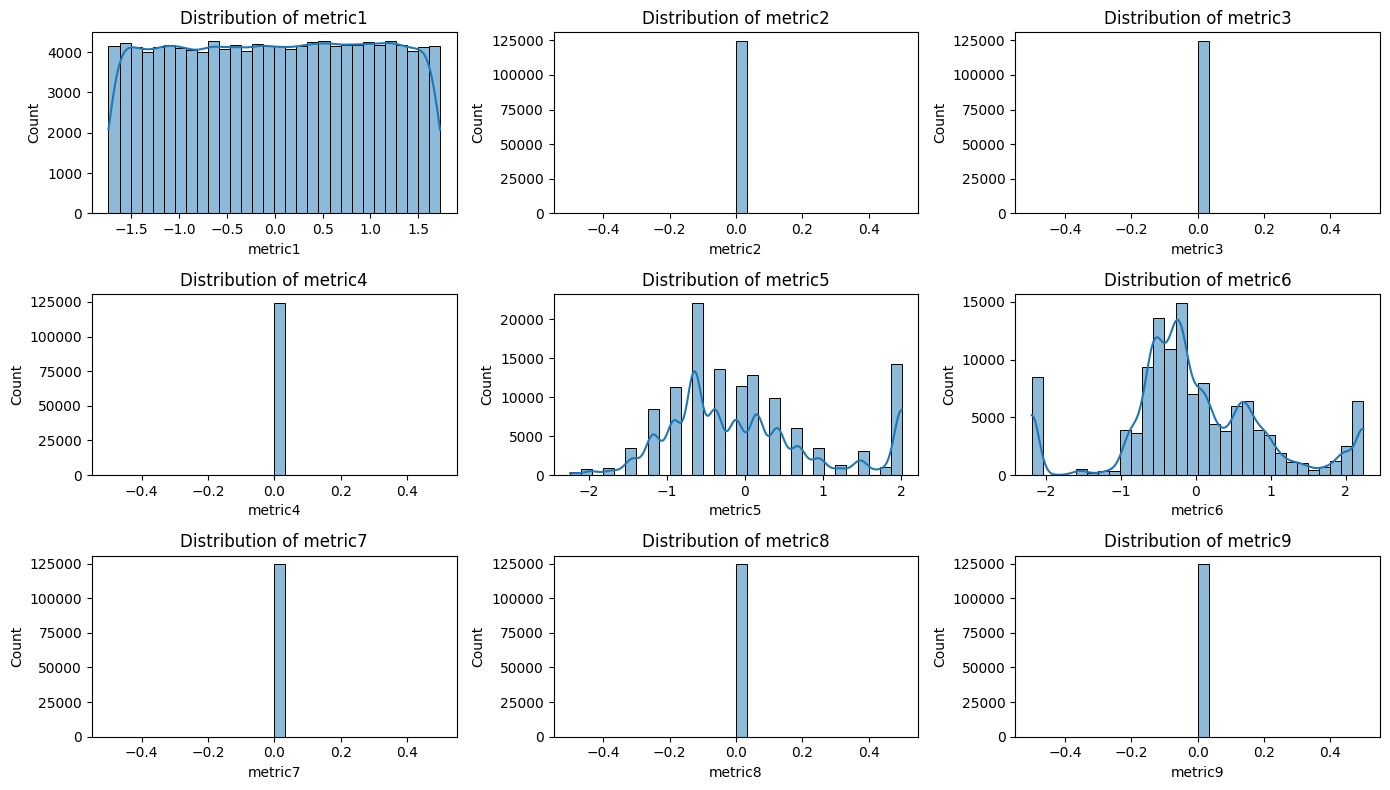

In [33]:
# 1. Distribution of numeric columns (before/after scaling)
plt.figure(figsize=(14, 8))
for i, col in enumerate(columns_to_scale):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

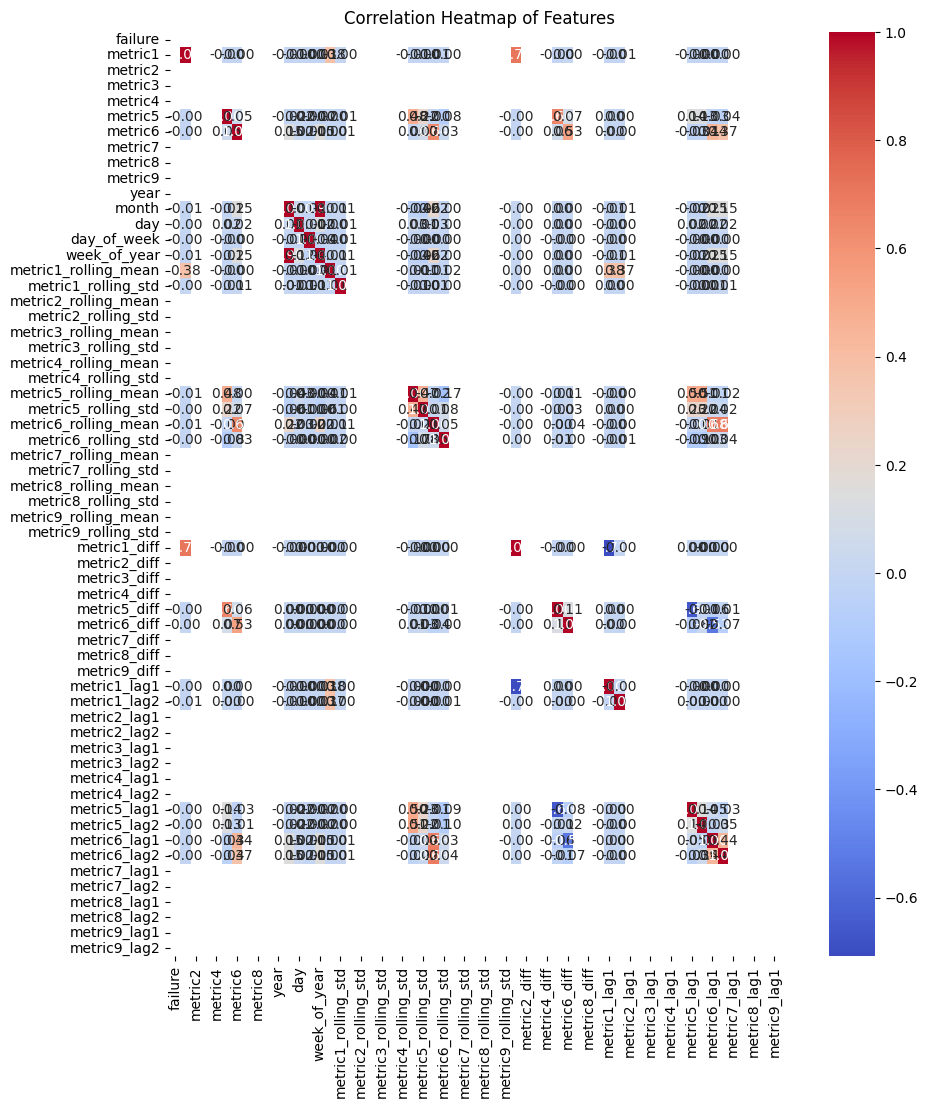

In [36]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

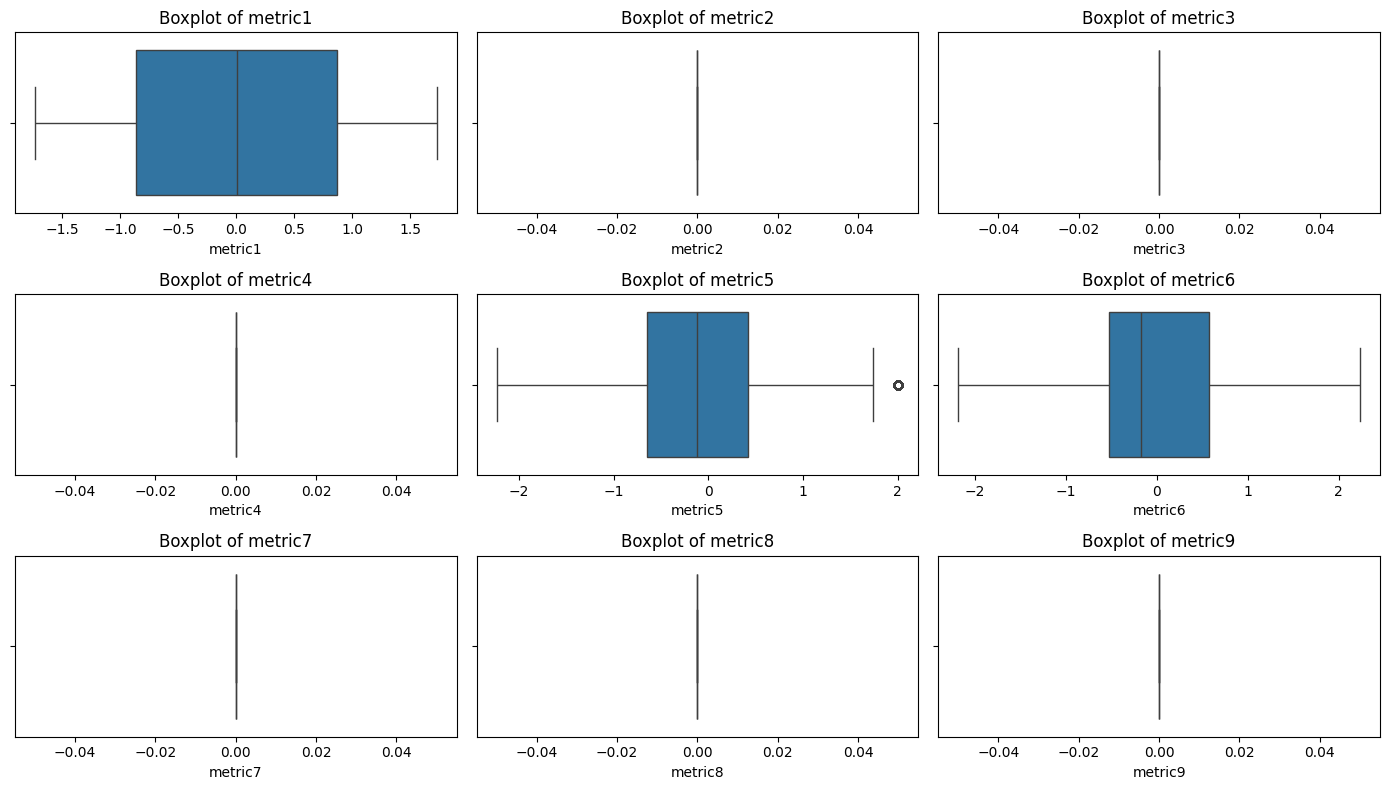

In [37]:
# 3. Boxplot to Visualize Outliers (Before & After Outlier Handling)
plt.figure(figsize=(14, 8))
for i, col in enumerate(columns_to_scale):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

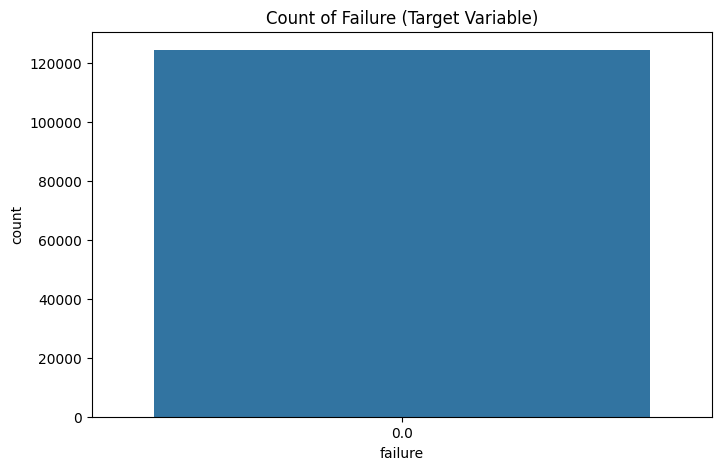

In [40]:
# 4. Count plot for target variable (failure)
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title('Count of Failure (Target Variable)')
plt.show()

In [41]:
# Output the shapes of the training and testing sets
print(f"Training Features: {X_train.shape}, Training Labels: {y_train.shape}")
print(f"Testing Features: {X_test.shape}, Testing Labels: {y_test.shape}")

Training Features: (99595, 9), Training Labels: (99595,)
Testing Features: (24899, 9), Testing Labels: (24899,)
